## サイコロの出た目の和と分布について

1個のさいころを $m$ 回投げて，以下のルールで各回の得点を決める。

- 1回目は，出た目が得点になる。
- 2回目は，出た目が1回目と同じならば得点は0，異なれば出た目が得点になる。
- 3回目は，出た目が1回目または2回目と同じならば得点は0，どちらとも異なれば出た目が得点になる。
- $2\leqq k\leqq m$とする。$k$ 回目は$1$〜 $k-1$ 回目に出た目と異なれば，出た目が得点になる。 

$m$ 回の得点の和を総得点とし，総得点が$n$となる場合の分布を作ってみたい！

#### まずは， $m=3$の場合を求めてみよう。

In [20]:
C=[]
for i=1:6,j=1:6,k=1:6
    A=[i,j,k] #3つのサイコロの目
    B=union(A)  # 同じ数字があったら，1つにする。
    c=sum(B)  #リスト内を全部加える。
    append!(C,c) #上の和を1つのリストにする。・
end

x=maximum(C)
#y=minimum(C) #リストCの最大の数をチェック
D=[]
for l=1:x
  d=count(C.==l) #それぞれの数が何個あるか数える。
  append!(D,d)  #上の結果を1つのリストにする。
end
D


15-element Vector{Any}:
  1
  1
  7
  7
 13
 19
 24
 24
 30
 24
 24
 18
 12
  6
  6

In [26]:
using Plots

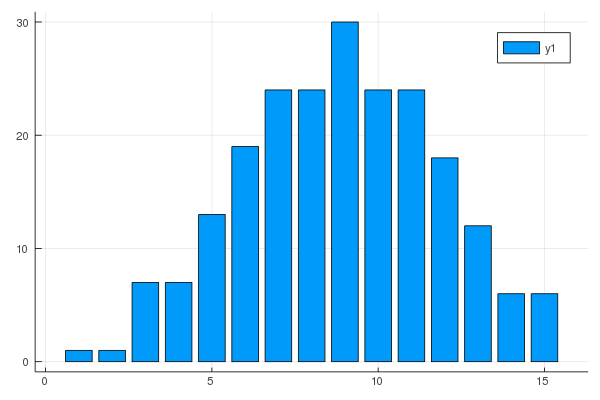

In [64]:
plot(D,st=:bar)

$m=3$ の場合，綺麗な山型だ。

#### 次は$m=4$の場合

In [65]:
C=[]
for i=1:6,j=1:6,k=1:6,l=1:6
    A=[i,j,k,l]
    B=union(A)
    c=sum(B)
    append!(C,c)
end

x=maximum(C)
#y=minimum(C)
D=[]
for l=1:x
  d=count(C.==l)
  append!(D,d)
end
D

18-element Vector{Any}:
   1
   1
  15
  15
  29
  65
  78
 100
 136
 146
 146
 156
 120
 108
  84
  48
  24
  24

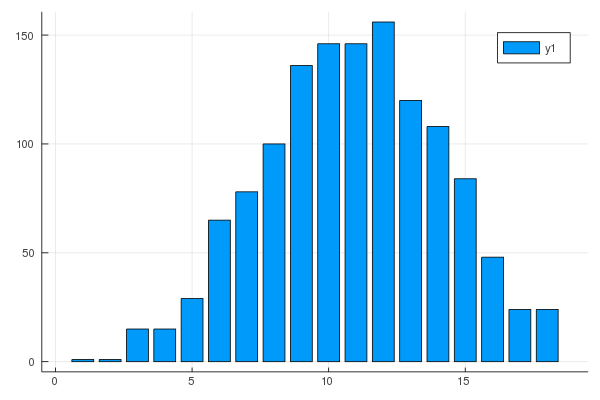

In [67]:
plot(D,st=:bar)

$m=4$ の場合，山が右にずれる。

#### ここからは大変なので少しマクロ化して一般の$m$回に耐えれるコードにしよう。

In [6]:
all_perm(x, n) = vec(map(collect, Iterators.product(ntuple(_ -> x, n)...))) #重複順列を作る関数

function p(m)
  A=all_perm([1,2,3,4,5,6], m)
  C=[]
  for i=1:length(A)
    append!(C,sum(union(A[i])))
  end
  D=[]
  for l=1:maximum(C)
    append!(D,count(C.==l))
  end
  D
end


p (generic function with 1 method)

In [7]:
p(3)

15-element Vector{Any}:
  1
  1
  7
  7
 13
 19
 24
 24
 30
 24
 24
 18
 12
  6
  6

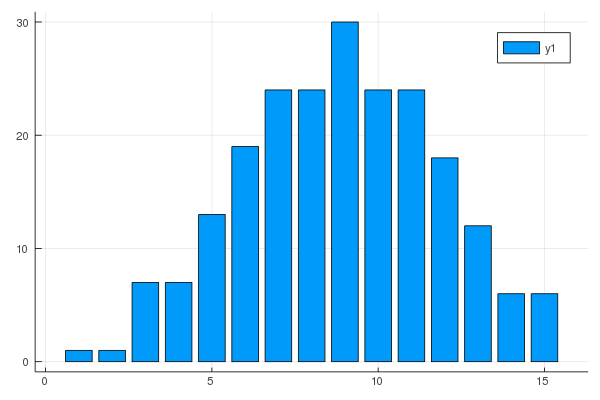

In [10]:

plot(p(3),st=:bar)


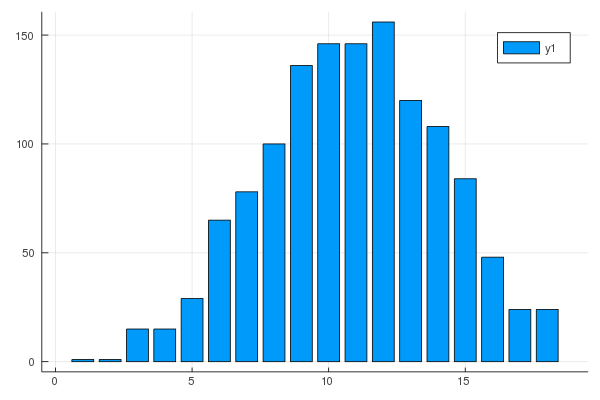

In [11]:
plot(p(4),st=:bar)

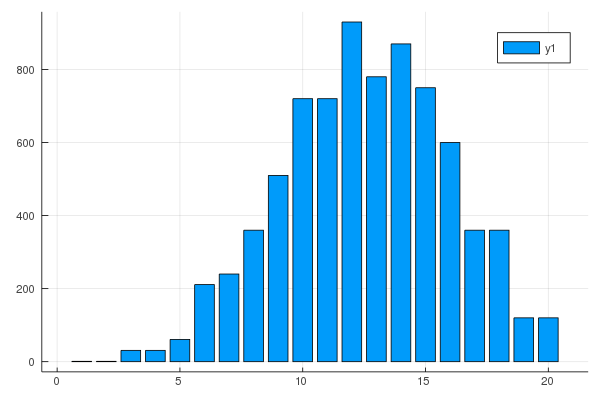

In [12]:
plot(p(5),st=:bar)

$m=5$をみてみると13が凹んでいる。13は作りにくいのだろう。

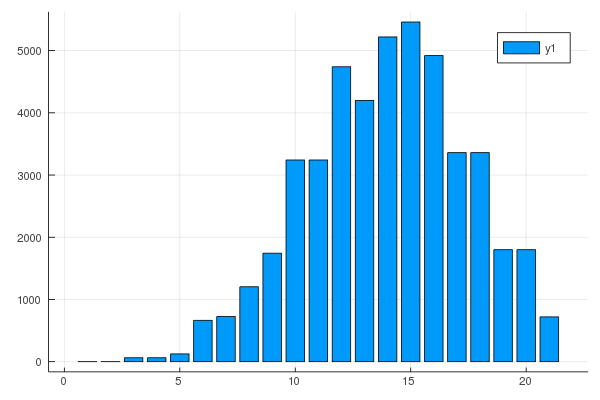

In [13]:
plot(p(6),st=:bar)

$m=6$　ここで最大値の$21=1+2+3+4+5+6$が登場。やはり$13$は低い。何でだろう？

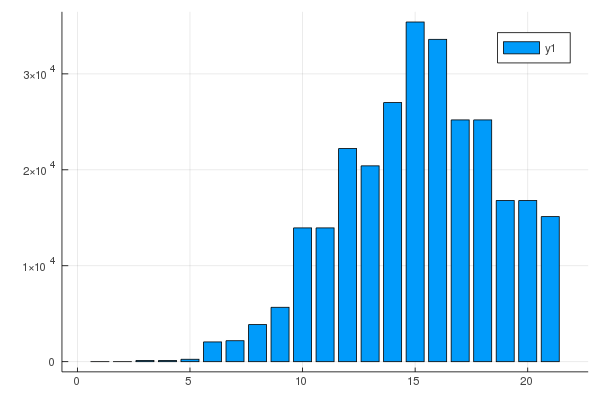

In [14]:
plot(p(7),st=:bar)

$m=7$ 最大値の当たりも増えてきた。15が一番高い。

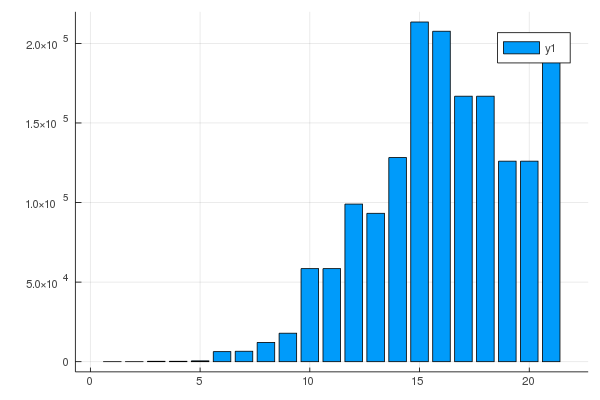

In [16]:
plot(p(8),st=:bar)

$m=8$ ここで最大値の21が伸びる。まあ，何度もサイコロを振っていれば，全部出るようになるよな。。。

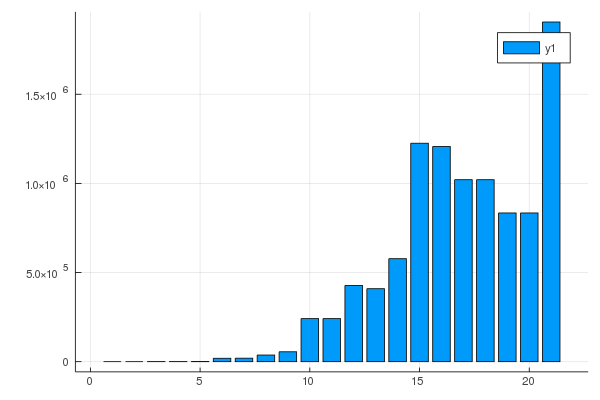

In [17]:
plot(p(9),st=:bar)

$m=9$ ついに15は首位陥落！，21がトップとなる！

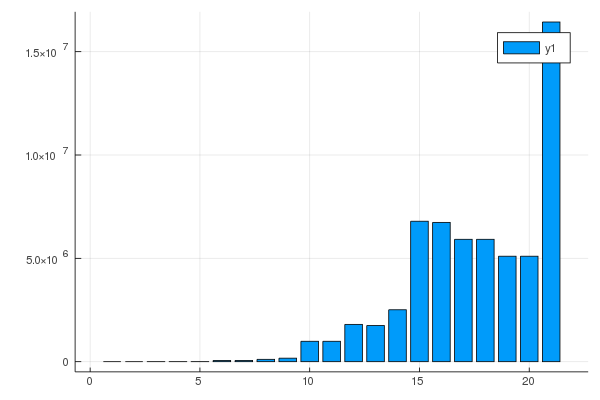

In [18]:
plot(p(10),st=:bar)

$m=10$ 計算に4分半かかる。この辺でやめておこう。21が多くなるけど，15も粘るよね。